# Polygons

Joining geographic points with U.S. and County polygons.

In [1]:
# Libraries

%run utilities.py
%matplotlib inline

In [2]:
# Geography libraries
import geopandas as gpd
import numpy as np
from matplotlib import pyplot as plt

from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap
from descartes import PolygonPatch
from shapely.geometry import Point

In [3]:
## Functions used
def plot_polygons(gdf_polygons):
    # create polygons
    patches = [PolygonPatch(geometry) for geometry in gdf[gdf['geometry'].notnull() == True]['geometry']]
    # group overlapping polygons
    pc = PatchCollection(patches, facecolor='#3399cc', linewidth=1, alpha=0.1)
    
    # create the map figure
    fig, ax = plt.subplots(figsize=(9.6, 5))
    ax.add_collection(pc)

    # ...then set the figure bounds to the polygons' bounds
    left, bottom, right, top = gdf.total_bounds
    ax.set_xlim((left,right))
    ax.set_ylim((bottom,top))
    plt.show()

---

In [13]:
# files
counties_f = name_file_path('attributes.json', external_maps_dir)

states_f = name_file_path('state.geo.json', external_maps_dir)

world_f = name_file_path('110m.json', external_maps_dir)

In [5]:
### Maps

# colors
land_color = '#DDDDDD'
water_color = '#D2F5FF'
coastline_color = '#333333'
border_color = '#999999'

# Dimensions
map_width_m = 5000 * 1000 #5000 km
map_height_m = 3500 * 1000 #3500 km

# Albers Conical Equal Area projection for USA
albers_usa = {
    'datum':'NAD83',
    'ellps':'GRS80',
    'proj':'aea', 
    'lat_1':33, 
    'lat_2':45, 
    'lon_0':-97, 
    'lat_0':39, 
    'x_0':map_width_m/2, 
    'y_0':map_height_m/2,
    'units':'m'
 }

In [6]:
### Read in and prepare the files
counties_temp = gpd.read_file(counties_f)

# geoseries
gsrs = gpd.GeoSeries(counties_temp.geometry)
gsrs = gsrs[gsrs.notnull() == True]

# set the projection
gsrs.crs = albers_usa


# geodataframe
gdf = gpd.GeoDataFrame(gsrs)

---

*test basic mapping*

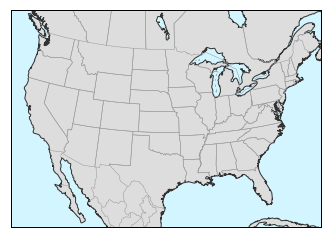

In [7]:
# matplotlib
m = Basemap(ellps=albers_usa['ellps'],
            projection=albers_usa['proj'],
            lat_1=albers_usa['lat_1'], 
            lat_2=albers_usa['lat_2'], 
            lon_0=albers_usa['lon_0'], 
            lat_0=albers_usa['lat_0'],
            width=map_width_m, 
            height=map_height_m,
            resolution='l', #l means low resolution boundaries
            area_thresh=10000) #coastline or lake with an area smaller than this km^2 will not be plotted

m.drawcoastlines(color=coastline_color)
m.drawcountries(color=border_color)
m.fillcontinents(color=land_color, lake_color=water_color)
m.drawstates(color=border_color)
m.drawmapboundary(fill_color=water_color)

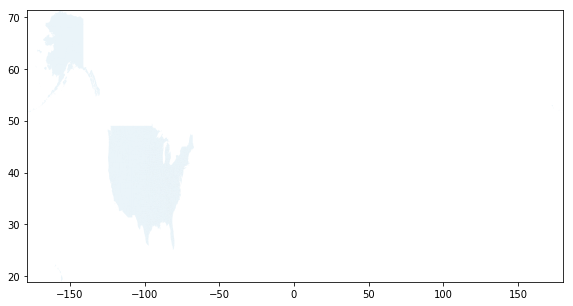

In [8]:
# parameterized
plot_polygons(gdf)

Self-intersection at or near point -133.29008073369155 56.134664408332597


<class 'shapely.geometry.multipolygon.MultiPolygon'>


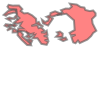

In [9]:
# in line plotting
print('{!r}'.format(type(gsrs.values[-1])))
gsrs.values[-1]

---

States, etc.

In [16]:
states = gpd.read_file(states_f)
states_df = gpd.GeoDataFrame(states)

In [27]:
# another example: remove any point data that lies within Alaska or Hawaii
# first grab the polygons from these states' geoseries using iloc
alaska_polygon = states[states['NAME10']=='Alaska']['geometry'].iloc[0]
hawaii_polygon = states[states['NAME10']=='Hawaii']['geometry'].iloc[0]

# now use a mask to select all points *not* within either state's polygon
# filter_pts[~alaska_hawaii_mask]